In [117]:
import numpy as np
import networkx as nx

def modified_ba_graph(n, m0, m, k):
    G = nx.complete_graph(m0)
    for i in range(m0):
        G.nodes[i]["Fitness"] = np.random.random()

    deg = nx.degree(G)
    i = m0 + 1
    while i < (n + 1):
        B = []
        G.add_node(i)
        G.nodes[i]["Fitness"] = np.random.random()
        
        total_degrees = sum([x[1] for x in deg])
        avg_degree = total_degrees / nx.number_of_nodes(G)
        total_df = 0
        for node in G.nodes():
            total_df += G.degree(node) * G.nodes[node]["Fitness"]
        
        # calculate probability of each node
        for node in G.nodes():
            node_degree = G.degree(node)
            node_fitness = G.nodes[node]["Fitness"]
            p = (node_degree * node_fitness) / total_df
            k_max = pow(k, node_fitness)
            if k_max >= node_degree:
                B.append(p)
            else:
                B.append(0)
        B_sum = sum(B)
        B = [i / B_sum for i in B]
        
        e = (i // (n // m)) + int(m * G.nodes[i]["Fitness"])
        
        # attach m edges to the nodes by preferential probability
        selected_nodes = np.random.choice(G.nodes(), e, replace = False, p = B)
        j = 0
        while j < (len(selected_nodes)):
            G.add_edge(i, selected_nodes.item(j))
            j += 1
        i += 1
    return G

def ba_graph(n, m0, m=1):
    G = nx.complete_graph(m0)

    deg = nx.degree(G)
    i = m0+1
    while i < (n+1):
        B = []
        G.add_node(i)
        add = sum([x[1] for x in deg])
        for nodes in G.nodes():
            d_n = G.degree(nodes)
            vals = d_n/add
            B.append(vals)

        nodes = np.random.choice(G.nodes(),m,replace = False,p=B)
        j=0
        while j < (len(nodes)):
            G.add_edge(i,nodes.item(j))
            j=j+1
        i=i+1
    return G  

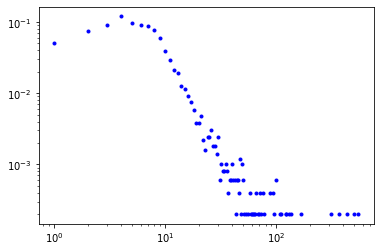

547
Calculating best minimal value for power law fit
1.5329141780967905
8.026


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [129]:
import matplotlib.pyplot as plt
import powerlaw

ba = modified_ba_graph(5000, 5, 5, 1000)

# loglog degree distribution
degree=nx.degree_histogram(ba)#返回图中所有节点的度分布序列
x=range(len(degree))#生成X轴序列，从1到最大度
y=[z/float(sum(degree)) for z in degree]#将频次转化为频率，利用列表内涵
plt.loglog(x,y,'.',c='blue')
plt.show()#显示图

# power law estimation
fit = powerlaw.Fit(degree)
print(fit.power_law.alpha)
deg = nx.degree(ba)
total_degrees = sum([x[1] for x in deg])
avg_degree = total_degrees / nx.number_of_nodes(ba)
print(avg_degree)

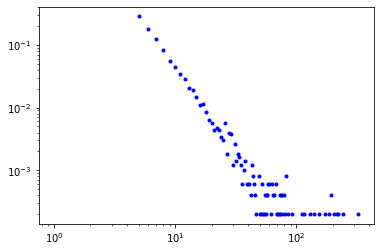

Calculating best minimal value for power law fit
1.5837875208947598
9.994


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [99]:
import matplotlib.pyplot as plt
import powerlaw

ba2 = ba_graph(5000, 5, 5)

# loglog degree distribution
degree=nx.degree_histogram(ba2)#返回图中所有节点的度分布序列
x=range(len(degree))#生成X轴序列，从1到最大度
y=[z/float(sum(degree)) for z in degree]#将频次转化为频率，利用列表内涵
plt.loglog(x,y,'.',c='blue')
plt.show()#显示图

# power law estimation
fit = powerlaw.Fit(degree)
print(fit.power_law.alpha)
deg = nx.degree(ba2)
total_degrees = sum([x[1] for x in deg])
avg_degree = total_degrees / nx.number_of_nodes(ba2)
print(avg_degree)

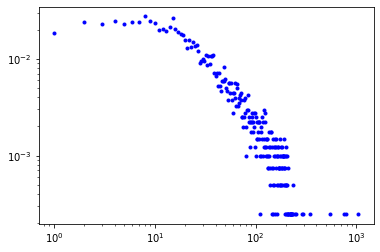

1046
Calculating best minimal value for power law fit
1.8126478275905782
43.69101262688784


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [130]:
import pandas as pd

facebook = pd.read_csv(
    "facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
fb_graph = nx.from_pandas_edgelist(facebook, "start_node", "end_node")
# loglog degree distribution
degree=nx.degree_histogram(fb_graph)#返回图中所有节点的度分布序列
x=range(len(degree))#生成X轴序列，从1到最大度
y=[z/float(sum(degree)) for z in degree]#将频次转化为频率，利用列表内涵
plt.loglog(x,y,'.',c='blue')
plt.show()#显示图

# power law estimation
fit = powerlaw.Fit(degree)
print(fit.power_law.alpha)

# average degree
deg = nx.degree(fb_graph)
total_degrees = sum([x[1] for x in deg])
avg_degree = total_degrees / nx.number_of_nodes(fb_graph)
print(avg_degree)